# Spider Image Classifier

This is an image classifier to classify **5  different species of spiders**. The species included are: </br>


*   Wolf Spider
*   Hobo Spider
*   Brown Recluse Spider
*   Goliath Spider
*   Parasteatoda Spider 

The classifier is built on ResNet34 and a dataset created from Google Image Search results. </br>
Library used: fastai


In [0]:
from fastai.vision import *

In [0]:
folder = ['wolf', 'hobo', 'brown-recluse', 'goliath', 'parasteatoda']
files = [x + '-spider.csv' for x in folder]

## Downloading Images

[This Repository](https://github.com/RohitNagraj/SpiderSpeciesClassifier.git) contains the csv files of all the different images required for the dataset.

In [0]:
! git clone https://github.com/RohitNagraj/SpiderSpeciesClassifier.git

Cloning into 'SpiderSpeciesClassifier'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 33 (delta 8), reused 23 (delta 4), pack-reused 0
Unpacking objects: 100% (33/33), done.


In [0]:
cd SpiderSpeciesClassifier/Dataset/

/content/SpiderSpeciesClassifier/Dataset


Creating folders for each label

In [0]:
for x in folder:
  path = Path('./')
  dest = path/x
  dest.mkdir(parents=True, exist_ok=True)

In [0]:
classes = ['wolf', 'hobo', 'brown-recluse', 'goliath', 'parasteatoda']

Downloading images

In [0]:
for x in folder:
  file = x+'-spider.csv'
  download_images(file, x, max_pics=200)

*verify_images*  checks for the downloaded images and deletes any that aren't in the proper format


In [0]:
for x in folder:
  print(x)
  verify_images(x, delete=True, max_size=500)

## Organizing Data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['brown-recluse', 'goliath', 'hobo', 'parasteatoda', 'wolf']

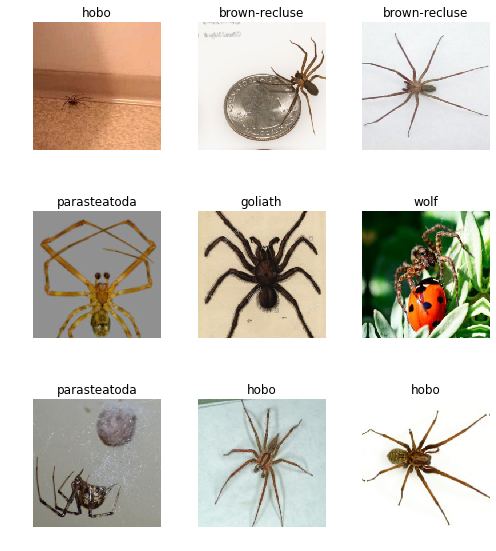

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['brown-recluse', 'goliath', 'hobo', 'parasteatoda', 'wolf'], 5, 734, 183)

## CNN Learner

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 90786507.89it/s]


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.470249,0.639867,0.229508,00:13
1,1.049311,0.511072,0.196721,00:11
2,0.799775,0.542159,0.202186,00:11
3,0.676804,0.524665,0.191257,00:11


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


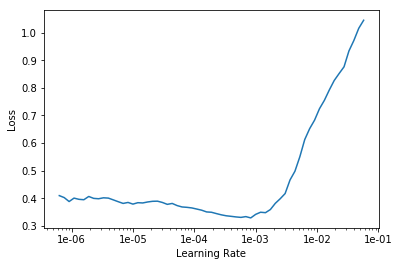

In [0]:
learn.recorder.plot()

### Discriminative Learning Rate

In [0]:
learn.fit_one_cycle(5, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.393390,0.614004,0.191257,00:12
1,0.369211,1.079385,0.240437,00:12
2,0.329327,1.206039,0.262295,00:12
3,0.289578,0.727051,0.174863,00:12
4,0.241192,0.654989,0.174863,00:12


In [0]:
learn.save('stage-2')

## Results
### Avg. Accuracy: 82.5%

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

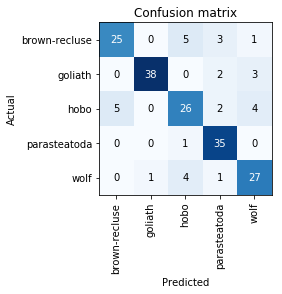

In [0]:
interp.plot_confusion_matrix()